# SUMMER ANALYTICS 2023

## WEEK-4 ASSIGNMENT

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

[The Car Evaluation Database](https://drive.google.com/file/d/1ck5JUuRP0MY_k1hFwqx5Uc8iQJwqHkYJ/view?usp=sharing) contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [ ]:
# Read the csv file as data
df = pd.read_csv('/content/drive/MyDrive/Datasets/car_evaluation.csv')
# you may print first few rows
# data.head()
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [ ]:
df.describe()

vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209

In [ ]:
# view dimensions of dataset
df.shape

(1727, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [ ]:
# check missing values in variables
#write your code here
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

There are no missing values in any column.

**Declare feature vector and target variable**

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [ ]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [ ]:
# check data types in X_train
X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [ ]:
X_train.head()

buying  maint  doors persons lug_boot safety
83    vhigh  vhigh  5more       2      med    low
48    vhigh  vhigh      3    more      med    med
468    high  vhigh      3       4    small    med
155   vhigh   high      3    more      med    low
1043    med   high      4    more    small    low

We can see that all the variables are ordinal categorical data type.



In [ ]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [ ]:
X_train.head()


buying  maint  doors  persons  lug_boot  safety
83         3      3      3        0         1       1
48         3      3      1        2         1       2
468        0      3      1        1         2       2
155        3      0      1        2         1       1
1043       2      0      2        2         2       1

Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [ ]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.69825 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators= 1000, random_state=0)

model_ada = abc.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)
#YOUR CODE HERE

In [ ]:
#lets calculate the accuracy of the model that used ababoost.

print("AdaBoostClassifier model accuracy: ",accuracy_score(y_test, y_pred))

AdaBoostClassifier model accuracy:  0.7771929824561403


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

model_rf.fit(X_train, y_train)

#YOUR CODE HERE

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [ ]:
#lets calculate the accuracy of the model using Random forest classifier
model_rf.score(X_test, y_test)

0.9543859649122807

AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [ ]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#lets calculate the accuracy score for the model using Gaussian NB classifier
model_gnb.score(X_test,y_test)

0.6140350877192983

In [ ]:
# KNN: KNeighborsClassifier
#YOUR CODE HERE

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# lets check the accuracy of the model that used KNN
y_pred = knn.predict(X_test)

print("Accuracy of model that used KNN: ", accuracy_score(y_test,y_pred))

#for k=6 we are getting max accuracy. I have checked for other values of k and concluded

Accuracy of model that used KNN:  0.9105263157894737


In [ ]:
# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=14, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=0)

In [ ]:
# lets check the accuracy
y_pred_gini = clf_gini.predict(X_test)

print("Accuracy of the model after using Decision Trees is: ", accuracy_score(y_test, y_pred_gini))

# maximum accuracy is obtained when max_depth = 14. This has been conclude after checking with other values as well

Accuracy of the model after using Decision Trees is:  0.9754385964912281


Visualize decision-trees

[Text(0.5413851351351351, 0.9642857142857143, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5278716216216216, 0.8928571428571429, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5548986486486487, 0.8928571428571429, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.27407094594594594, 0.8214285714285714, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.15625, 0.75, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.05405405405405406, 0.6785714285714286, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04054054054054054, 0.6071428571428571, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.02702702702702703, 0.5357142857142857, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.013513513513513514, 0.4642857142857143, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.0

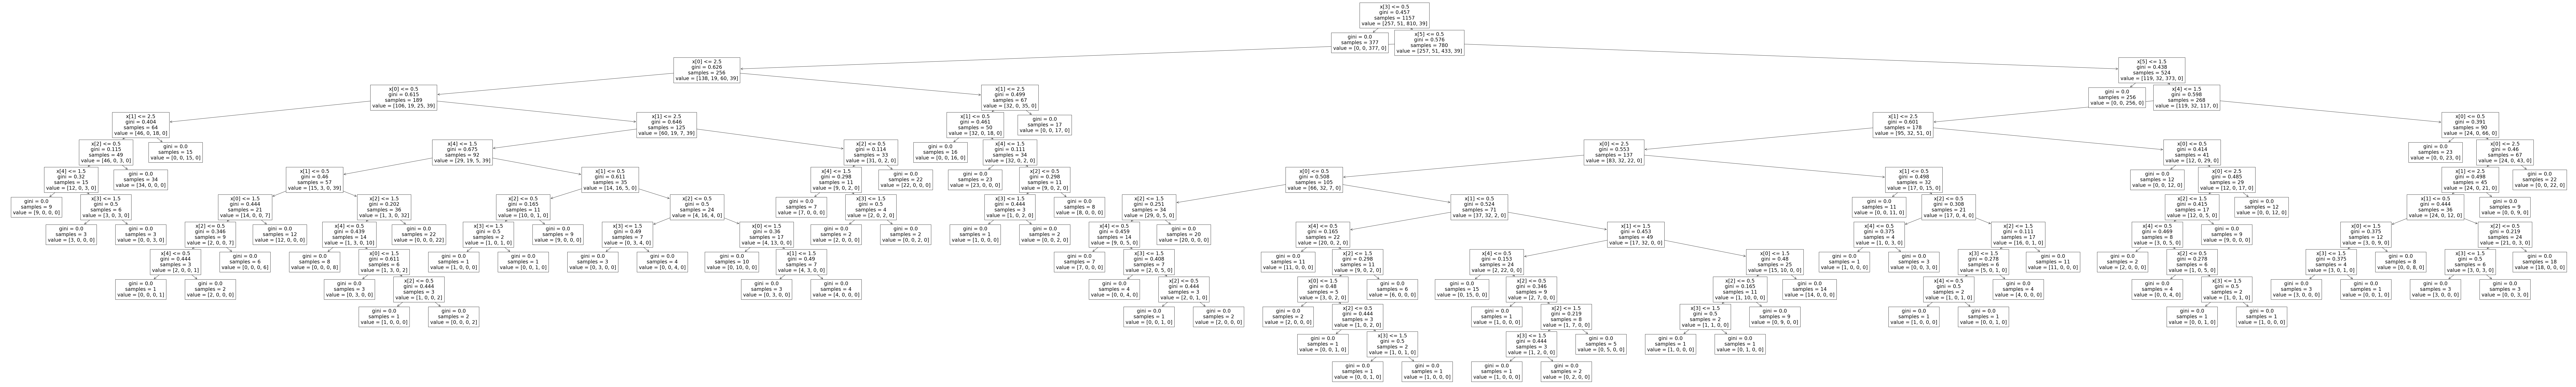

In [ ]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(clf_gini)

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

In [ ]:
#YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state=0)

clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print("Accuracy of the model after using Decision Trees is: ", accuracy_score(y_test, y_pred_gini))


Accuracy of the model after using Decision Trees is:  0.9596491228070175


[Text(0.5491727941176471, 0.9545454545454546, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5344669117647058, 0.8636363636363636, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5638786764705882, 0.8636363636363636, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.29825367647058826, 0.7727272727272727, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.17003676470588236, 0.6818181818181818, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.058823529411764705, 0.5909090909090909, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04411764705882353, 0.5, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.029411764705882353, 0.4090909090909091, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.014705882352941176, 0.3181818181818182, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]

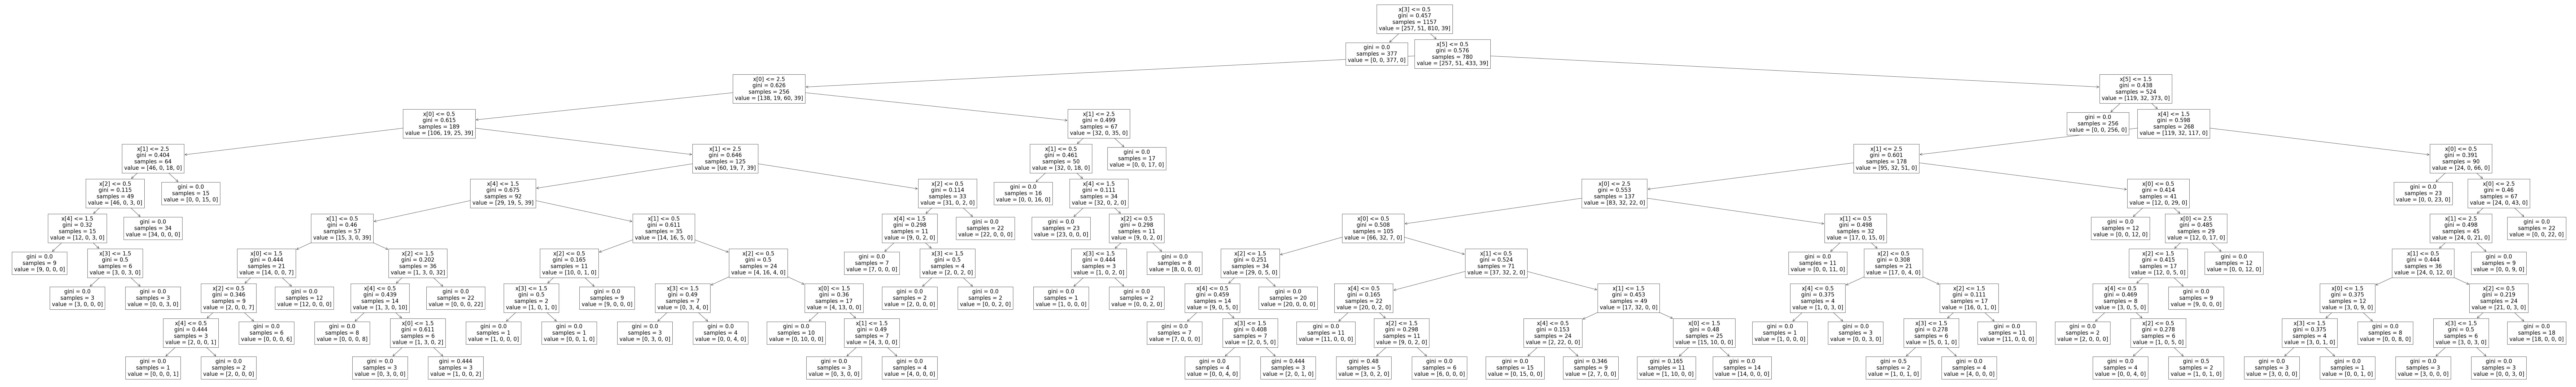

In [ ]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(clf_gini)

Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

In [ ]:
#YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=8, random_state=0)

clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print("Accuracy of the model after using Decision Trees is: ", accuracy_score(y_test, y_pred_gini))

Accuracy of the model after using Decision Trees is:  0.9263157894736842


[Text(0.5845588235294118, 0.9444444444444444, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5649509803921569, 0.8333333333333334, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.6041666666666666, 0.8333333333333334, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.37254901960784315, 0.7222222222222222, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.21568627450980393, 0.6111111111111112, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.0784313725490196, 0.5, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.058823529411764705, 0.3888888888888889, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.0392156862745098, 0.2777777777777778, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.0196078431372549, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),


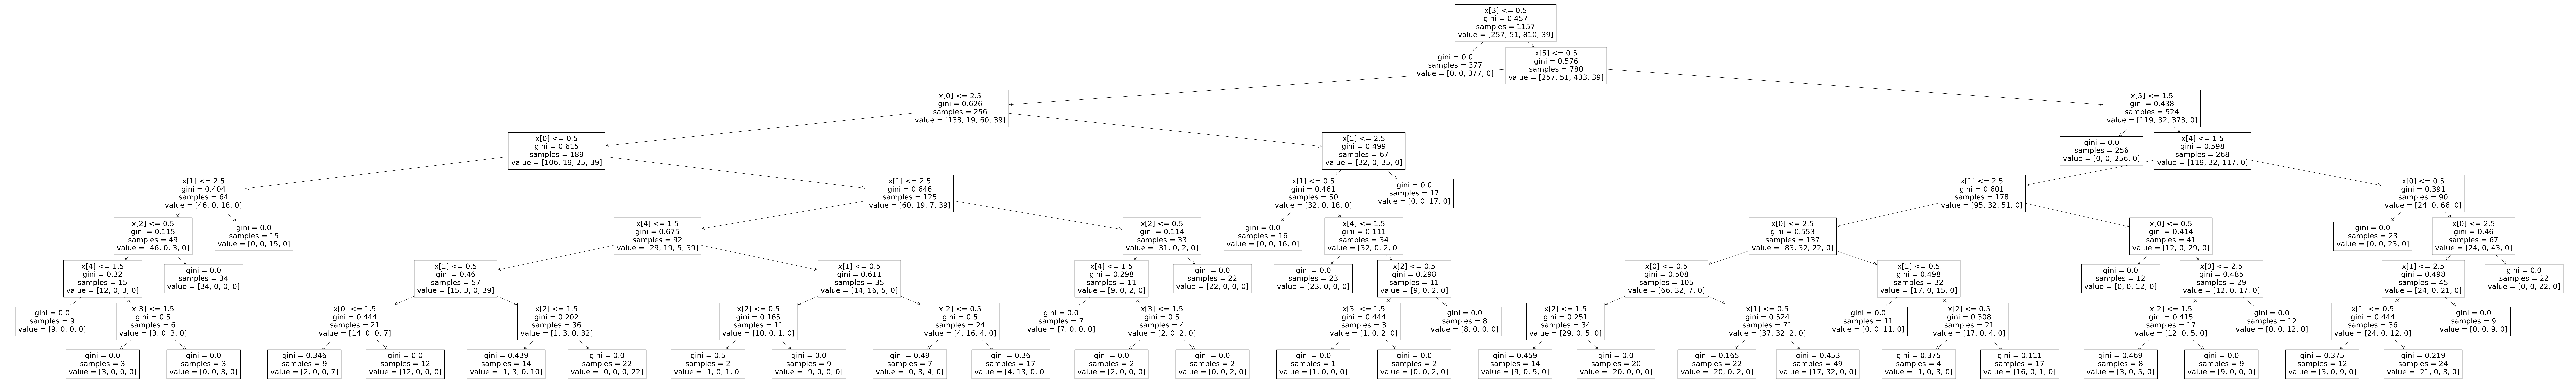

In [ ]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(clf_gini)

Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [ ]:
# XGBClassifier
#YOUR CODE HERE

#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ordinal_mapping = {k: i for i, k in enumerate(
    y_train.unique(), 0)}
ordinal_mapping

y_train = y_train.map(ordinal_mapping)
y_train.head(10)
y_train.dtype

#here the y_train values are in object type and we need to change them into interger or float type as the model can't fit object values

model_boost = XGBClassifier(n_estimators=1000, learning_rate=0.01)
model_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


Visualize XGBClassifier

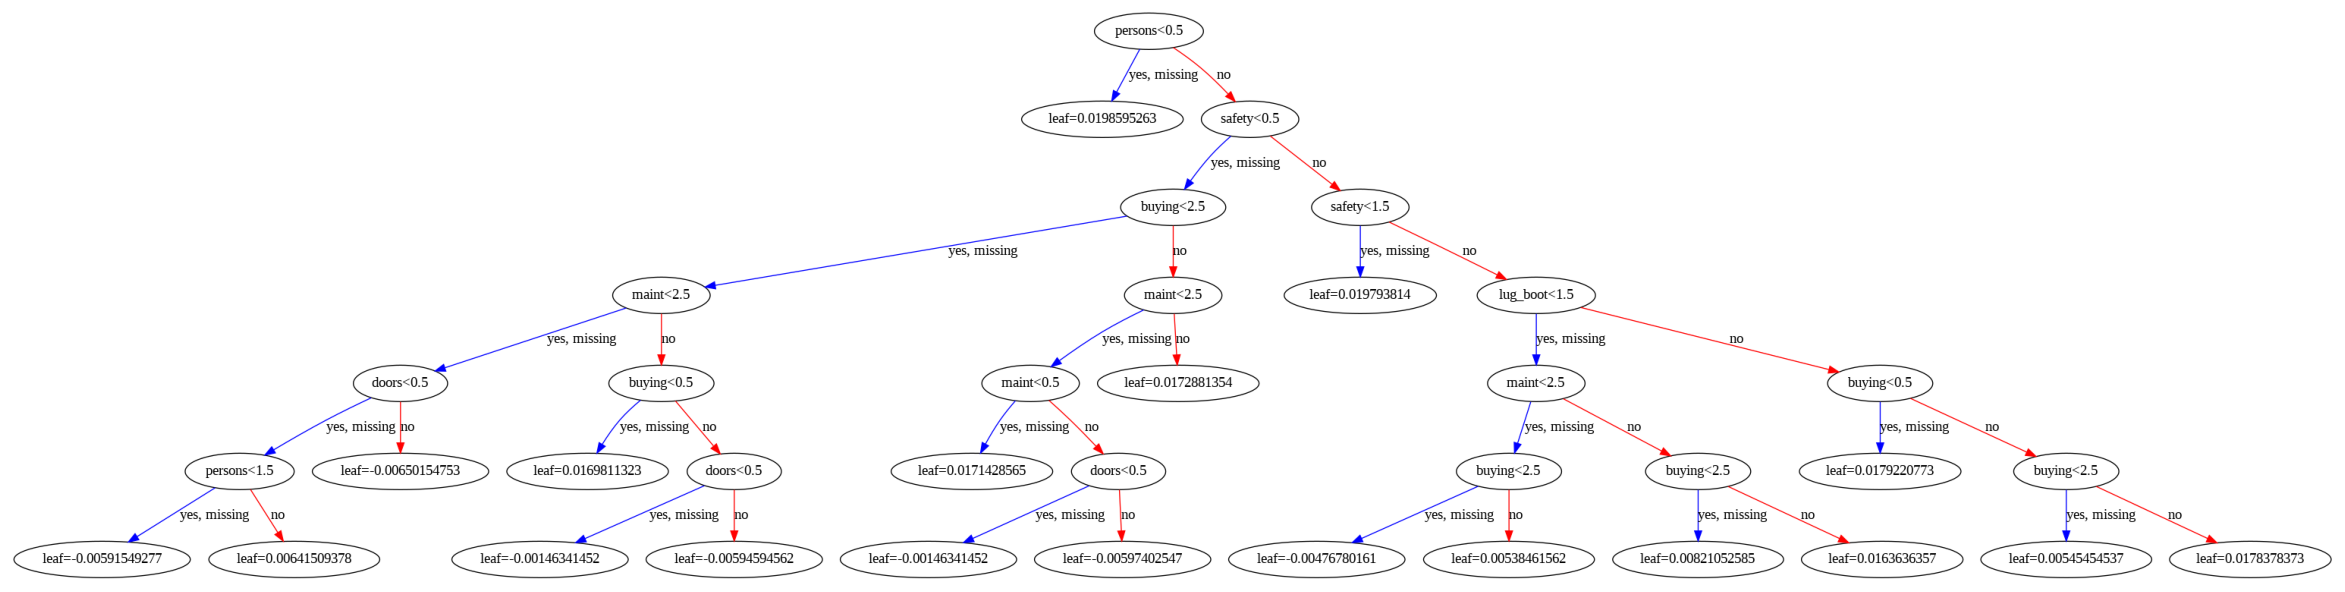

In [ ]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
#change the model name
plot_tree(model_boost, ax=ax)
plt.show()

Now, heres a task for you. Try XGBRFClassifier on your own.

**Random Forests(TM) in XGBoost**
XGBoost is normally used to train gradient-oosted decision trees and other gradient boosted models. Random Forests use the same model representation and inference, as gradient-boosted decision trees, but a different training algorithm. One can use XGBoost to train a standalone random forest or use random forest as a base model for gradient boosting. Here we focus on training standalone random forest.

In [ ]:
# XGBRFClassifier
# here RF refers to Random Forests



Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

In [ ]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ordinal_mapping = {k: i for i, k in enumerate(
    y_train.unique(), 0)}
ordinal_mapping

y_train = y_train.map(ordinal_mapping)
y_train.head(10)
y_train.dtype

#here the y_train values are in object type and we need to change them into interger or float type as the model can't fit object values

model_boost = XGBClassifier(n_estimators=1000, learning_rate=0.1)
model_boost.fit(X_train, y_train)

y_predicted = model_boost.predict(X_test)
y_predicted

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 0, 2, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 3, 2, 0, 3, 0, 2, 2,
       3, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2,

In [ ]:
ordinal_mapping = {k: i for i, k in enumerate(
    y_test.unique(), 0)}
ordinal_mapping

y_test = y_test.map(ordinal_mapping)
y_test.head(10)
y_test.dtype


confusion_matrix(y_test, y_predicted)

array([[399,   0,   0,   0],
       [  0,   3, 123,   1],
       [  0,   0,   1,  25],
       [  0,  13,   1,   4]])

8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

In [ ]:
# Cell to find Feature Importance
#YOUR CODE HERE
X_en = X.apply(LabelEncoder().fit_transform)
#y_en = y.apply(LabelEncoder().fit_transform)
ordinal_mapping = {k: i for i, k in enumerate(
    y.unique(), 0)}
ordinal_mapping

y_en = y.map(ordinal_mapping)

In [ ]:
X_en_mean = X_en.mean()
X_en_std = X_en.std()
Z = (X_en-X_en_mean)/X_en_std

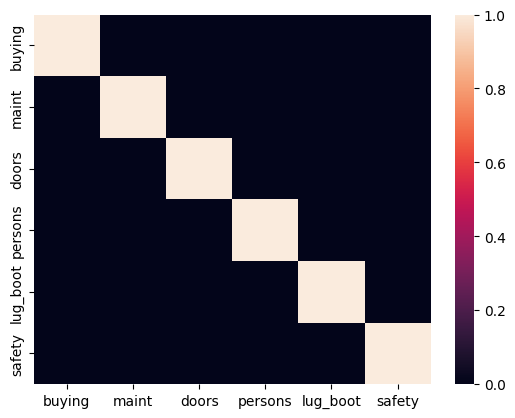

In [ ]:
#plotting the covariance matrix
c = Z.cov()

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [0.99611106 1.00093291 1.00104336 1.00104336 1.00086931 1.        ]
Eigen values shape: (6,)
Eigen Vector Shape: (6, 6)


In [ ]:
#sorting the eigen values in descending order and sort the corresponding eigen vectors accordingly.

idx = eigenvalues.argsort()[::-1] #indexing in descending order
eigenvalues = eigenvalues[idx] #sort them in descending order
eigenvectors = eigenvectors[:,idx]

#explained variance is the term tthat gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.16684056, 0.33368112, 0.50050327, 0.66731482, 0.83398149,
       1.        ])

In [ ]:
#determining the number of principal components.

n_components = np.argmax(explained_var >= 0.50) + 1
n_components

3

**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [ ]:
#YOUR CODE HERE
